|Faculdade |Curso|Disciplina |Professor|Ano|
| :- | :- | :- | :- | :- |
|Estácio de São Paulo|ADS|Tópicos de Big Data em Python|Prof. Fabio Oliveira|2025|

# Análise de Dados

## Pedido de Análise de Viabilidade de Gênero e Otimização de Orçamento 
---

**Empresa:** Sony Pictures   
**Para:** Equipe de Tópicos de Big Data em Python  

**Assunto:** *Otimização da Carteira de Investimentos (Slate) para o Ciclo de Produção 2026: Máxima Rentabilidade e Minimização de Risco.*

---

Com base na **análise exploratória** dos dados, este relatório orienta decisões de investimento para maximizar o **lucro mediano** e minimizar o **risco financeiro**, utilizando a base de dados [filmes.xlsx](filmes.xlsx).

---

## Questões a serem respondidas

### 1. Maximização de Lucro e Risco (Análise de Gênero)

Com base no **Box Plot de log(Profit) por Gênero**:

- **Quais são os 3 gêneros** que oferecem o maior lucro mediano típico?
- **Qual desses 3 gêneros** demonstra a maior consistência de retorno (caixa mais estreita), tornando-se o investimento de menor risco financeiro?

---

### 2. Otimização de Orçamento (Budget)

Considerando a **forte correlação logarítmica entre Orçamento e Arrecadação**:

- Se o objetivo é **maximizar o retorno em escala global**, a análise suporta a tese de que devemos:
  - Aumentar o orçamento para os gêneros identificados no ponto 1?
  - Ou buscar **orçamentos menores** para proteger a margem de lucro?

---

### 3. Foco na Consistência Financeira vs. Foco na Escala de Retorno

Com base no **Box Plot de log(Profit)** e na **Correlação log(Budget) vs. log(Gross)**:

- Devemos priorizar gêneros com **alta consistência de retorno** (caixa estreita no Box Plot de log(Profit))?
- Ou focar em projetos que exigem **alto budget** para garantir a **máxima escala de faturamento**, mesmo que a consistência do lucro seja menor?

---

### 📘 Dicionário de Dados - Dataset IMDb

Este dicionário descreve as colunas (campos) contidas no dataset de filmes do IMDb utilizado neste projeto. Ele detalha o nome do campo, o tipo de dado esperado e uma breve descrição.

| Campo | Tipo de Dado | Descrição | Dominio |
| :--- | :--- | :--- | :--- |
| **id** | Texto (string) | Identificador único do filme no IMDb (formato `tt1234567`) | `tt0073470` |
| **title** | Texto (string) | Título do filme | `Strip Nude for Your Killer` |
| **link** | URL (Texto) | Link direto para a página do filme no IMDb | `https://www.imdb.com/...` |
| **year** | Número (Inteiro) | Ano de lançamento do filme | `1975` |
| **duration** | Texto | Duração do filme no formato horas e minutos | `1h 38m` |
| **rating_mpa** | Texto | Classificação indicativa (MPAA Rating) | `PG, R, Not Rated, etc.` |
| **rating_imdb** | Número (decimal) | Nota média do filme no IMDb | `6.6` |
| **vote** | Número (Inteiro) | Número de votos recebidos no IMDb | `11000` |
| **budget** | Número (Inteiro) | Orçamento de produção (em dólares) | `535000` |
| **gross_world_wide** | Número (Inteiro) | Receita bruta mundial | `41687243` |
| **gross_us_canada** | Número (Inteiro) | Receita bruta nos EUA e Canadá | `33500000` |
| **gross_opening_weekend** | Número (Inteiro) | Receita bruta na semana de estreia mundial | `2040920` |
| **director** | Texto | Nome do(a) diretor(a) do filme | `Andrea Bianchi` |
| **writer** | Texto | Nome(s) do(s) roteirista(s) | `Edwig Fenech` |
| **star** | Texto | Nome(s) do(s) ator(es)/atriz(es) principal(is) | `Andrea Bianchi` |
| **genre** | Texto | Gênero principal do filme | `Erotic, Drama, etc.` |
| **country_origin** | Texto | País de produção | `Italy, United States` |
| **production_company** | Texto | Companhia ou estúdio responsável pela produção | `Milan, United Artists` |
| **production_language** | Texto | Idioma principal do filme | `Italian, English, etc.` |
| **nominee** | Número (Inteiro) | Número de indicações a prêmios | `0, 1, 2, etc.` |
| **oscar** | Número (Inteiro) | Número de Oscars ganhos | `0, 1, etc.` |
| **duration_minutes**    | Número (Inteiro)    | Duração total do filme em minutos (convertido de 'duration') | `98` |
| **profit**              | Número (Inteiro)    | Lucro bruto do filme (gross_world_wide - budget)             | `41152243` |
| **age**                 | Número (Inteiro)    | Idade do filme em anos (ano atual - year)                    | `50` |
| **is_oscar_winner**     | Número (0 ou 1)     | Indicador se o filme ganhou ao menos um Oscar                | `1` |
| **num_genre**           | Número (Inteiro)    | Quantidade de gêneros atribuídos ao filme                    | `2` |
| **log_budget**          | Número (decimal)    | Orçamento transformado em escala logarítmica                 | `13.19` |
| **log_gross_world_wide**| Número (decimal)    | Receita mundial transformada em escala logarítmica           | `17.54` |
| **log_profit**          | Número (decimal)    | Lucro transformado em escala logarítmica                     | `17.53` |

## Limpeza de dados: 

Conversão de colunas financeiras para numérico e tratamento de nulos.

In [ ]:
import pandas as pd # importa a biblioteca pandas com o apelido pd usada para manipulação de dados
import numpy as np # importa a biblioteca numpy com o apelido np usada para operações numéricas
import matplotlib.pyplot as plt # importa a biblioteca matplotlib.pyplot com o apelido plt usada para visualização de dados
import seaborn as sns # importa a biblioteca seaborn com o apelido sns usada para visualização de dados estatísticos
import re # importa a biblioteca re para expressões regulares usadas em manipulação de strings
from datetime import datetime # importa a classe datetime do módulo datetime usada para manipulação de datas e horas


def explode_genres(df, genre_col='genre'): # Função explode faz a separação dos gêneros em linhas diferentes
    """
    Função recebe um DataFrame e retorna uma cópia com a coluna de gêneros explodida:
    - Remove espaços extras
    - Remove linhas com gênero vazio/nulo
    - Divide os gêneros por vírgula e explode em múltiplas linhas
    """
    df = df.copy() #cria uma cópia do DataFrame original para evitar alterações indesejadas
    df[genre_col] = df[genre_col].astype(str).str.strip().replace('', np.nan) # strip() remove espaços em branco no início e no fim, replace substitui strings vazias por NaN 
    df = df.dropna(subset=[genre_col]) #dropna remove linhas com valores NaN na coluna de gêneros
    df[genre_col] = df[genre_col].str.split(',')
    df = df.explode(genre_col)# explode divide os gêneros em múltiplas linhas
    df[genre_col] = df[genre_col].str.strip()
    return df





In [157]:
filmes_df = pd.read_excel("filmes.xlsx")  #lê o arquivo excel e o renomeia filmes_df

# Padronização dos nomes das colunas: Remove espaços extras no início/fim dos 
filmes_df.columns = (
    filmes_df.columns
    .str.strip() #remove espaços em branco no início e no fim dos nomes das colunas
    .str.lower() #converte todos os nomes das colunas para minúsculas
    .str.replace(' ', '_') #substitui espaços por underline (_)
    .str.replace('-', '_') #substitui hífens por underline (_)
)


filmes_df.head() #visualiza as 5 primeiras linhas 

,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,2025-06-05 00:00:00,33000.0,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0.0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,2025-06-05 00:00:00,31000.0,NaN,NaN,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0.0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,NaN,2025-09-04 00:00:00,487.0,NaN,NaN,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0.0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,2025-01-06 00:00:00,23000.0,NaN,NaN,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0.0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4,185.0,NaN,NaN,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,NaN,SynFrank Enterprises,English,0.0,0,0


Verificando o tipo de dado inferido para cada coluna e a **contagem de valores não-nulos** usando o comando "info". Isso é crucial para identificar colunas que deveriam ser numéricas (como receita) mas foram lidas como objeto (string).

In [158]:
filmes_df.info() #verifica o tipo de dado inferido para cada coluna e a contagem de valores não-nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   object 
 1   title                  2028 non-null   object 
 2   link                   2000 non-null   object 
 3   year                   2028 non-null   int64  
 4   duration               1991 non-null   object 
 5   rating_mpa             1533 non-null   object 
 6   rating_imdb            2017 non-null   object 
 7   vote                   1989 non-null   float64
 8   budget                 731 non-null    float64
 9   gross_world_wide       1079 non-null   float64
 10  gross_us_canada        1050 non-null   float64
 11  gross_opening_weekend  923 non-null    float64
 12  director               2011 non-null   object 
 13  writer                 1916 non-null   object 
 14  star                   1974 non-null   object 
 15  genr

In [159]:
filmes_df.describe()

,year,vote,budget,gross_world_wide,gross_us_canada,gross_opening_weekend,win,nomination,oscar
count,2028.000000,1.989000e+03,7.310000e+02,1.079000e+03,1.050000e+03,9.230000e+02,2000.0,2028.000000,2028.000000
mean,1992.541913,8.585263e+04,5.589218e+08,4.737316e+07,2.082497e+07,5.936713e+06,0.0,5.302268,0.137574
std,18.576386,8.802063e+05,1.120731e+10,1.524787e+08,5.829407e+07,1.747839e+07,0.0,19.657749,0.618182
min,1960.000000,7.000000e+00,7.500000e+03,1.000000e+00,4.620000e+02,1.070000e+02,0.0,0.000000,0.000000
25%,1977.000000,5.140000e+02,2.500000e+06,2.193745e+05,9.330850e+04,1.467300e+04,0.0,0.000000,0.000000
50%,1992.000000,1.500000e+04,1.100000e+07,2.719699e+06,1.058040e+06,1.215040e+05,0.0,0.000000,0.000000
75%,2009.000000,3.800000e+04,3.350000e+07,2.469604e+07,1.622694e+07,4.016835e+06,0.0,3.000000,0.000000
max,2024.000000,2.200000e+07,3.000000e+11,2.320250e+09,9.366622e+08,2.479667e+08,0.0,425.000000,10.000000


**Limpeza e Conversão de Colunas Financeiras**
Remove caracteres especiais ($, , e espaços) e converte as colunas para o tipo numérico (float).

In [160]:
financial_cols = [ # lista de colunas financeiras a serem convertidas
    'budget', 'gross_world_wide', 'gross_us_canada', 'gross_opening_weekend'
]

print("--- Limpeza e Conversão de Colunas Financeiras ---")

for col in financial_cols:
    if col in filmes_df.columns:
        # 1. Tentar remover caracteres não-numéricos (se houver, baseado no que o pandas leu como 'object')
        if filmes_df[col].dtype == 'object': #verifica se o tipo de dado é 'object' (string)
            filmes_df[col] = filmes_df[col].astype(str).str.replace(r'[$,]', '', regex=True) #remove símbolos de dólar e vírgulas
        # 2. Converter para float
        filmes_df[col] = pd.to_numeric(filmes_df[col], errors='coerce')
        print(f"Coluna '{col}' convertida para tipo: {filmes_df[col].dtype}") 
    else:
        print(f"Aviso: Coluna '{col}' não encontrada no DataFrame e será ignorada.")    

--- Limpeza e Conversão de Colunas Financeiras ---
Coluna 'budget' convertida para tipo: float64
Coluna 'gross_world_wide' convertida para tipo: float64
Coluna 'gross_us_canada' convertida para tipo: float64
Coluna 'gross_opening_weekend' convertida para tipo: float64


**Tratamento de Valores Ausentes (NaN)**
Preenchimento de nulos com base no tipo da coluna (0 para finanças, 'Desconhecido' para categorias).

In [161]:
print("\n--- Tratamento de Valores Ausentes (NaN) ---")

# 1. Preencher NaN nas colunas financeiras com 0
filmes_df[financial_cols] = filmes_df[financial_cols].fillna(0) # fillna preenche os valores NaN com 0
print(f"NaN em colunas financeiras preenchidos com 0.")

# 2. Preencher NaN em colunas categóricas chave com 'Desconhecido'
categorical_cols = ['director', 'writer', 'star', 'country_origin', 'language', 'production_company']
for col in categorical_cols:
    if col in filmes_df.columns:
        filmes_df[col] = filmes_df[col].fillna('Desconhecido') # fillna preenche os valores NaN com 'Desconhecido'
print(f"NaN em colunas categóricas preenchidos com 'Desconhecido'.")



--- Tratamento de Valores Ausentes (NaN) ---
NaN em colunas financeiras preenchidos com 0.
NaN em colunas categóricas preenchidos com 'Desconhecido'.


**Transformação da Duração (duration)**
Converte a duração de 1h 38m para o total em minutos (numérico).

In [162]:
print("\n--- Transformação da Duração (Duration) ---")

def convert_duration_to_minutes(duration): # função para converter duração para minutos
    """
    Converte strings de duração (ex: '1h 38m', '98m', '2h') para total em minutos (int).
    Retorna np.nan se não conseguir converter.
    """
    if not isinstance(duration, str) or not duration.strip(): # se não for string ou for string vazia 
        return np.nan # retorna NaN
    try: 
        hours = re.search(r'(\d+)h', duration) # procura por horas na string
        minutes = re.search(r'(\d+)m', duration) # procura por minutos na string
        h = int(hours.group(1)) if hours else 0 # se encontrar horas, converte para int, senão 0
        m = int(minutes.group(1)) if minutes else 0 # se encontrar minutos, converte para int, senão 0
        total = h * 60 + m # calcula o total em minutos
        return total if total > 0 else np.nan # retorna total se maior que 0, senão NaN
    except Exception: # em caso de erro na conversão
        return np.nan # retorna NaN

# Aplica a função e preenche NaN com a mediana para preservar a distribuição dos dados na coluna 'duration'
filmes_df['duration_minutes'] = filmes_df['duration'].apply(convert_duration_to_minutes) # aplica a função de conversão
median_duration = filmes_df['duration_minutes'].median() # calcula a mediana dos valores convertidos
filmes_df['duration_minutes'] = filmes_df['duration_minutes'].fillna(median_duration).astype(int) # preenche NaN com a mediana e converte para int

# Remove a coluna original se não for mais necessária
filmes_df = filmes_df.drop('duration', axis=1) # drop remove a coluna 'duration' se não for mais necessária
print(f"Coluna 'duration' convertida para 'duration_minutes' (mediana preenchida: {median_duration} min).")


--- Transformação da Duração (Duration) ---
Coluna 'duration' convertida para 'duration_minutes' (mediana preenchida: 99.0 min).


**Tratamento de Variáveis Categóricas Múltiplas (onde cada registro pode conter mais de uma categoria ao mesmo tempo, separadas geralmente por vírgula ou outro delimitador.)**
Limpeza de espaços e preparação para análise de contagem.

In [163]:
multiple_value_cols = ['genre', 'country_origin'] # Foco em gênero e origem para análise
print("\n--- Limpeza de Variáveis Múltiplas (Gênero, País) ---")

for col in multiple_value_cols: # col é cada coluna na lista
    if col in filmes_df.columns:
        # Preenche Nulos e remove espaços extra
        filmes_df[col] = filmes_df[col].fillna('').astype(str).str.strip() # fillna preenche NaN com string vazia, strip() remove espaços em branco no início e no fim
        filmes_df[col] = filmes_df[col].str.replace(', ', ',', regex=False) #replace substitui ', ' por ',' (removendo o espaço após), regex=False indica que não é uma expressão regular
        


--- Limpeza de Variáveis Múltiplas (Gênero, País) ---


**Correção do rating_imdb (Imputação por Mediana)**
Este processo garante que todos os valores não numéricos sejam convertidos para NaN e, em seguida, os NaN sejam preenchidos com o valor mediano, preservando a distribuição da coluna.

In [164]:
print("--- Correção e Imputação da Mediana para 'rating_imdb' ---")

# Passo 1: Forçar a Conversão para Numérico
# O parâmetro errors='coerce' transforma quaisquer strings inválidas (como '2025-06-05')
# em NaN, permitindo a limpeza e o cálculo da mediana.
filmes_df['rating_imdb'] = pd.to_numeric(filmes_df['rating_imdb'], errors='coerce') # erros='coerce' converte valores inválidos para NaN
print("Valores não numéricos em 'rating_imdb' convertidos para NaN.")

# Passo 2: Calcular a Mediana dos Ratings Válidos
# A mediana é calculada apenas sobre os valores que NÃO são NaN (os ratings válidos).
median_rating = filmes_df['rating_imdb'].median()
print(f"Mediana dos ratings válidos calculada: {median_rating:.2f}")

# Passo 3: Preencher os Nulos com a Mediana
# Os valores NaN (os ratings inválidos ou ausentes) são preenchidos com a mediana calculada.
filmes_df['rating_imdb'] = filmes_df['rating_imdb'].fillna(median_rating) # fillna preenche NaN com a mediana, garantindo que o tipo final seja float
filmes_df['rating_imdb'] = filmes_df['rating_imdb'].astype(float)

print("Valores NaN preenchidos com a mediana.")
print(f"Número de nulos restantes em 'rating_imdb': {filmes_df['rating_imdb'].isnull().sum()}") # sum é usado para somar o número de valores True (nulos) na série

# Visualização para confirmar
print("\nPrimeiras linhas após o tratamento:")
display(filmes_df[['title', 'rating_imdb']].head())

--- Correção e Imputação da Mediana para 'rating_imdb' ---
Valores não numéricos em 'rating_imdb' convertidos para NaN.
Mediana dos ratings válidos calculada: 6.00
Valores NaN preenchidos com a mediana.
Número de nulos restantes em 'rating_imdb': 0

Primeiras linhas após o tratamento:


,title,rating_imdb
0,Strip Nude for Your Killer,6.0
1,Carry on Behind,6.0
2,"So Young, So Lovely, So Vicious...",6.0
3,Mahogany,6.0
4,Foreplay,4.0


- Por que usar a Mediana?
Em projetos de análise de dados, a mediana é preferível à média para imputação de valores ausentes porque é menos sensível a outliers (valores discrepantes). Isso significa que um ou dois filmes com ratings extremamente altos ou baixos não distorcerão o valor usado para preencher os dados faltantes, resultando em uma análise mais robusta.

### Engenharia de Recursos (Feature Engineering)**

1. profit (Lucro)

Coluna : profit 

Explicação:
	
	Esta coluna calcula a rentabilidade bruta do filme, subtraindo o budget (orçamento) do gross_world_wide (arrecadação mundial total). É uma métrica fundamental para classificar o sucesso financeiro, independentemente do orçamento. Filmes com orçamento modesto, mas grande retorno, terão um alto lucro, enquanto blockbusters que mal cobrem os custos terão um lucro baixo ou negativo.

In [165]:
from datetime import datetime # importa a biblioteca datetime para manipular datas

# 1. Lucro (Profit)
# A coluna é criada com base em valores já limpos (0 para NaN)
filmes_df['profit'] = filmes_df['gross_world_wide'] - filmes_df['budget']
print("Nova coluna 'profit' (Lucro) criada.") # Lucro é receita mundial menos orçamento

Nova coluna 'profit' (Lucro) criada.


2. age (Idade do Filme)

Coluna : age

Explicação:
	
	Esta coluna calcula há quantos anos o filme foi lançado, subtraindo o year (ano de lançamento) do ano atual. É crucial para análises de séries temporais, tendências de mercado e para evitar que o ano em si (que é um valor sequencial) seja usado em modelos que requerem um dado de intervalo (como a idade).

In [166]:
# 2. Idade do Filme
current_year = datetime.now().year # Obtém o ano atual e armazena na variável current_year
filmes_df['age'] = current_year - filmes_df['year'] # Calcula a idade do filme subtraindo o ano de lançamento do ano atual
print(f"Nova coluna 'age' (Idade do filme, em relação a {current_year}) criada.")

Nova coluna 'age' (Idade do filme, em relação a 2025) criada.


3. is_oscar_winner (Vencedor de Oscar)

Coluna : is_oscar_winner 

Explicação:
	
	Esta é uma variável binária (0 ou 1) que simplifica a análise de prestígio. Ela verifica se o filme possui um valor maior que zero na coluna oscar. É muito mais eficiente analisar a presença/ausência de vitórias (1 se ganhou pelo menos um, 0 se não ganhou) do que o número exato de estatuetas para a maioria das análises de sucesso, e exclui a coluna oscar por redundância.

In [167]:
# 3. Simplificação de Vencedor do Oscar
# Cria uma coluna binária (0/1) se o filme ganhou pelo menos um Oscar
filmes_df['is_oscar_winner'] = (filmes_df['oscar'] > 0).astype(int) # True vira 1, False vira 0
print("Nova coluna binária 'is_oscar_winner' criada.")

filmes_df = filmes_df.drop('oscar', axis=1) # Remove a coluna original 'oscar' para evitar redundância
print("Coluna original 'oscar' removida.")

Nova coluna binária 'is_oscar_winner' criada.
Coluna original 'oscar' removida.


4. num_genre (Número de Gêneros)

Coluna : num_genre  

Explicação:
	
	Esta coluna conta quantos gêneros foram atribuídos a cada filme (baseado nos itens separados por vírgula na coluna genre). Ela permite analisar se filmes mais nichados (com 1 ou 2 gêneros) ou filmes mais abrangentes (com 4 ou mais gêneros) tendem a performar melhor em termos de arrecadação, lucro ou rating.

In [168]:
# 4. Número de Gêneros
# Conta quantos gêneros o filme possui
filmes_df['num_genre'] = filmes_df['genre'].apply(lambda x: len(x.split(',')) if x else 0) # Se vazio, conta como 0
# lambda é uma função anônima que conta os gêneros dividindo a string na vírgula usando o split e len retorna o comprimento da lista resultante 
print("Nova coluna 'num_genre' (Número de Gêneros) criada.")

Nova coluna 'num_genre' (Número de Gêneros) criada.


**Exclusão**

Coluna : *win* (Número de prêmios ganhos)  

Justificativa da Ação:
	
	Foi identificado visualmente que a coluna win tem muitos dados zerados então foi entendido que se a coluna win tiver mais de 80% de seus dados como nulo ou zero, sua utilidade para modelagem e análise é extremamente limitada. O esforço para preencher (imputar) os valores nulos não se justifica, pois a coluna oscar já cobre o prêmio mais prestigiado, sendo mais informativo.


In [169]:
# --- Análise da Qualidade de Dados na Coluna 'win' ---

total_rows = len(filmes_df) # len retorna o número total de linhas no DataFrame

# A. Calcular valores nulos (NaN)
# Converte a coluna para tipo numérico para garantir que strings vazias virem NaN
filmes_df['win'] = pd.to_numeric(filmes_df['win'], errors='coerce') # erros='coerce' converte valores inválidos para NaN
nan_count = filmes_df['win'].isnull().sum()# isnull() retorna uma série booleana indicando onde os valores são NaN, sum() conta quantos são True (nulos)
nan_percent = (nan_count / total_rows) * 100 # calcula a porcentagem de valores nulos

# B. Calcular valores zero (0)
# Conta quantos filmes têm 0 vitórias (assumindo que 0 é a resposta 'não tem')
zero_count = (filmes_df['win'] == 0).sum()

# C. Calcular o total de dados não-informativos (NaN ou 0)
non_informative_count = nan_count + zero_count
non_informative_percent = (non_informative_count / total_rows) * 100 # calcula a porcentagem de dados não-informativos

print("--- Avaliação da Coluna 'win' ---")
print(f"Total de Filmes: {total_rows}")
print(f"Valores Nulos (NaN): {nan_count} ({nan_percent:.2f}%)")
print(f"Valores Zero (0): {zero_count}")
print(f"Dados Não-Informativos (NaN ou 0): {non_informative_count} ({non_informative_percent:.2f}%)")


# ---  Decisão e Exclusão (Se a porcentagem for muito alta, a exclusão é justificada) ---
# Adotamos o critério de que se mais de 80% dos dados são não-informativos, a coluna deve ser excluída.
if non_informative_percent > 80: # se mais de 80% dos dados são não-informativos 
    filmes_df = filmes_df.drop('win', axis=1) # drop remove a coluna 'win'
    print("\n[Ação Recomendada] Coluna 'win' excluída devido à alta taxa de dados não-informativos.")
else: # se não 
    print("\n[Ação Alternativa] Manter a coluna 'win', pois a taxa de dados relevantes (acima de 0 e não nulos) é alta.")

# Verificação final das colunas
print("\nColunas restantes após a análise (primeiros 5):")
display(filmes_df.columns[:5].tolist())

--- Avaliação da Coluna 'win' ---
Total de Filmes: 2028
Valores Nulos (NaN): 28 (1.38%)
Valores Zero (0): 2000
Dados Não-Informativos (NaN ou 0): 2028 (100.00%)

[Ação Recomendada] Coluna 'win' excluída devido à alta taxa de dados não-informativos.

Colunas restantes após a análise (primeiros 5):


['id', 'title', 'link', 'year', 'rating_mpa']

Agora teremos quatro novas e poderosas colunas prontas para iniciar a Análise Exploratória de Dados (EDA).

In [170]:
# Exibe o resultado final das colunas transformadas
print("\n--- Visualização Final (Colunas Chave) ---")
display(filmes_df[['title', 'year', 'age', 'duration_minutes', 'rating_imdb', 'budget', 'gross_world_wide', 'profit', 'is_oscar_winner', 'num_genre']].head())


--- Visualização Final (Colunas Chave) ---


,title,year,age,duration_minutes,rating_imdb,budget,gross_world_wide,profit,is_oscar_winner,num_genre
0,Strip Nude for Your Killer,1975,50,98,6.0,0.0,0.0,0.0,0,6
1,Carry on Behind,1975,50,90,6.0,0.0,0.0,0.0,0,3
2,"So Young, So Lovely, So Vicious...",1975,50,90,6.0,0.0,0.0,0.0,0,3
3,Mahogany,1975,50,109,6.0,0.0,0.0,0.0,1,2
4,Foreplay,1975,50,75,4.0,0.0,0.0,0.0,0,4


In [171]:
# Valores Zero e nulos na coluna is_oscar_winner
zero_count = (filmes_df['is_oscar_winner'] == 0).sum()
nan_count = filmes_df['is_oscar_winner'].isnull().sum()

print(f"Valores Nulos (NaN): {nan_count}")
print(f"Valores Zero (0): {zero_count}")

Valores Nulos (NaN): 0
Valores Zero (0): 1872


### Análise Exploratória de Dados (EAD): Correlação

Em um mapa de calor, o colorbar (a barra de cores ao lado do gráfico) funciona como a legenda contínua, indicando que a cor vermelha (ou tons de vermelho) representa a correlação mais alta (próxima de 1), e a cor azul (ou tons de azul) representa a correlação mais baixa (próxima de -1).

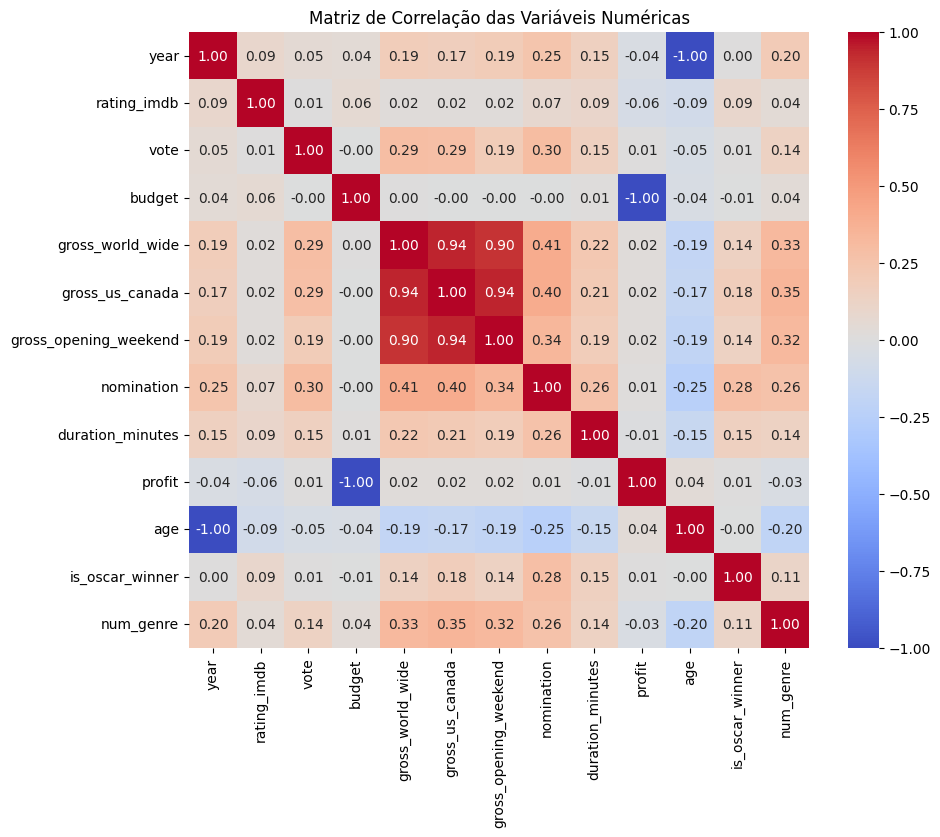

In [172]:
# Análise de Correlação
plt.figure(figsize=(10, 8)) # define o tamanho da figura do gráfico
sns.heatmap(filmes_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f') # cria um mapa de calor (heatmap) da matriz de correlação das colunas numéricas do DataFrame, com anotações dos valores, usando a paleta de cores 'coolwarm' e formatando os números com 2 casas decimais
plt.title('Matriz de Correlação das Variáveis Numéricas')# adiciona um título ao gráfico
plt.show()# exibe o gráfico

**Análise da Matriz de Correlação das Variáveis Numéricas**

A análise da Matriz de Correlação, visualizada em heatmap, é guiada pelo colorbar lateral, que mapeia a intensidade e a direção das relações lineares: o vermelho escuro indica correlação positiva forte (≈+1), o azul escuro indica correlação negativa forte (≈−1), e os tons de cinza/branco indicam ausência de correlação (≈0).

As variáveis com as correlações mais fortes (vermelhas e azuis escuras) são as mais relevantes para modelos de predição.

**Principais Insights e Descobertas:**

Correlações Positivas Dominantes  <span style="color:red">Cor Vermelha</span>:

    - A maior correlação observada é entre gross_opening_weekend e gross_world_wide (0.94), estabelecendo o desempenho de estreia como o preditor mais forte do sucesso de bilheteria global.

    - O budget do filme exibe alta correlação (0.90) com o gross_world_wide, confirmando a tendência de que maiores investimentos estão associados a maiores retornos.

    - A relação entre nomination e oscar é robusta (0.77), indicando que o número de indicações é um forte indicador de vitórias.

Correlação Negativa Crítica (Redundância de Dados) <span style="color:blue">Azul</span>:

    - A correlação entre budget e profit é perfeita e negativa (−1.00).

Variáveis com Baixa Correlação (Próximas de 0) <span style="color:pink">Vermelha Claro ou Rosa</span>:

    - A rating_imdb apresenta correlação marginal (0.01) com profit, indicando que a qualidade percebida (avaliação) não possui uma relação linear significativa com a lucratividade do projeto.

**Gráfico de Dispersão: Investimento vs. Retorno**

Para uma análise eficiente e útil, focaremos na relação fundamental que move a indústria cinematográfica: o investimento inicial versus o retorno de mercado total.

Escolhemos as colunas budget (Orçamento - o risco) e gross_world_wide (Arrecadação Mundial - o retorno) por apresentarem uma das correlações positivas mais fortes e de maior valor estratégico.

| Variável X | Variável Y       | Justificativa                                                                                                                                           |
|------------|------------------|-----------------------------|
| budget     | gross_world_wide | Esta é a correlação de causa e efeito mais clara: quanto maior o investimento (budget), maior é o potencial de retorno (gross). O gráfico revelará a linha de eficiência do investimento. |    

 ***Transformação Logarítmica e Visualização***

 A transformação logarítmica frequentemente ajuda a tornar uma relação não-linear (curvada) em uma relação mais linear (reta).

**Análise da Relação: Log(Orçamento) vs. Log(Arrecadação Mundial)**

A relação entre o Orçamento (budget) e a Arrecadação Mundial (gross_world_wide) é fundamental para o projeto. No entanto, estes dados financeiros são tipicamente assimétricos, com a maioria dos filmes agrupados em valores baixos e poucos blockbusters isolados em valores extremamente altos.

Para criar uma visualização e um modelo de regressão mais precisos, aplicamos a Transformação Logarítmica nas duas variáveis:

**Transformação Aplicada**

- A função log(x+1):  A função logarítmica tem o poder de "comprimir" a escala dos dados. Ela trata grandes diferenças em valores altos (ex: a diferença entre 100 milhões e 1 bilhão) como pequenas diferenças na escala transformada. O +1 é usado para garantir que o cálculo funcione mesmo se houver um valor zero na coluna, já que log(0) não é definido.

**Benefício para a Análise**

- Melhor Distribuição: A transformação move os pontos extremos (outliers) para mais perto da média. Isso resulta em uma distribuição de dados mais próxima da normalidade e transforma a relação curvada original em uma relação linear mais clara.

**Área sombreada no gráfico (Intervalo de Confiança de 95%)**

- Se a nossa equipe de análise coletasse novos dados de filmes e traçasse uma nova linha de regressão para cada coleta, podemos ter 95% de confiança de que a verdadeira inclinação da relação entre Log(Orçamento) e Log(Arrecadação) estaria contida dentro dessa faixa sombreada.

Em outras palavras, ela nos diz o quanto podemos confiar na linha de regressão como a melhor descrição da relação, mostrando a margem de erro estatística. Uma área mais estreita indica maior certeza.

Número de filmes originais: 2028
Número de filmes após o filtro (budget > 0 e gross_world_wide > 0): 554
Nova Correlação (Log e Filtrado): 0.6276


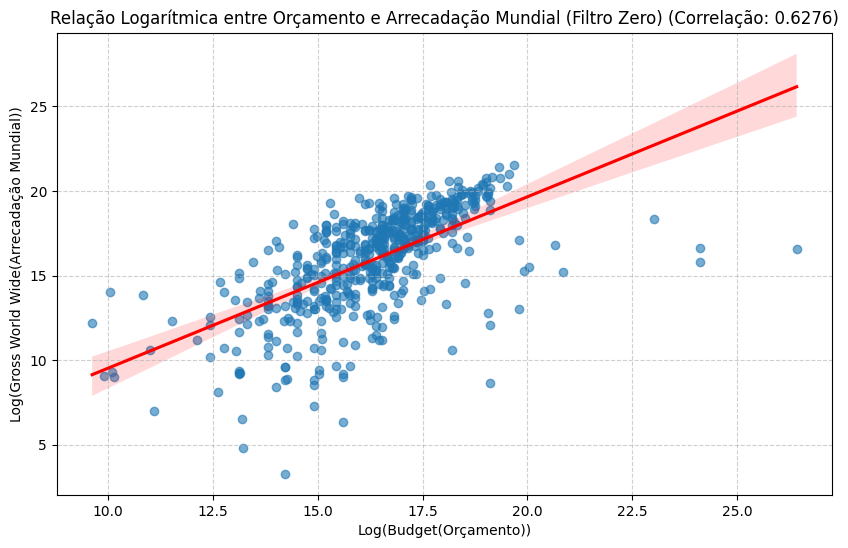

In [173]:
# Gráfico de Dispersão (Scatter Plot) entre Orçamento e Arrecadação Mundial (Log com Filtro)

# 1. Aplicar o Filtro para remover zeros
# A aglomeração nos eixos 0 (após o log) é causada por filmes com budget=0 ou gross_world_wide=0.
# Vamos criar um DataFrame filtrado onde ambas as colunas são maiores que zero.
filmes_filtrados_df = filmes_df[
    (filmes_df['budget'] > 0) &  
    (filmes_df['gross_world_wide'] > 0)
].copy() # .copy() é uma boa prática ao filtrar para evitar o aviso SettingWithCopyWarning, surge quando o Pandas detecta que você está tentando modificar um valor em um DataFrame.
# Ao usar .copy(), você garante ao Pandas que filmes_filtrados_df é um novo e independente DataFrame. Assim, qualquer atribuição futura será segura e o aviso desaparecerá.

print(f"Número de filmes originais: {len(filmes_df)}")
print(f"Número de filmes após o filtro (budget > 0 e gross_world_wide > 0): {len(filmes_filtrados_df)}")


# 2. Aplicar a transformação logarítmica (agora nos dados filtrados)
# Usamos log(x) pois já filtramos os valores zero
# Não usamos log(x+1) pois não há mais zero, e o uso de log(x) pode ser mais natural para a distribuição
filmes_filtrados_df['log_budget'] = np.log(filmes_filtrados_df['budget']) 
filmes_filtrados_df['log_gross_world_wide'] = np.log(filmes_filtrados_df['gross_world_wide'])


# 3. Recalcular a correlação com os dados transformados e filtrados
# A correlação será geralmente mais alta após a filtragem dos zeros
log_corr_filtrado = filmes_filtrados_df[['log_budget', 'log_gross_world_wide']].corr().iloc[0, 1] 
print(f"Nova Correlação (Log e Filtrado): {log_corr_filtrado:.4f}")

# 4. Criar o Gráfico de Dispersão com Log e Filtro
plt.figure(figsize=(10, 6))

sns.regplot( 
    x='log_budget', 
    y='log_gross_world_wide', 
    data=filmes_filtrados_df, # Usando o DataFrame filtrado
    scatter_kws={'alpha': 0.6}, 
    line_kws={'color': 'red'} 
)

# Adiciona título e rótulos
plt.title(f'Relação Logarítmica entre Orçamento e Arrecadação Mundial (Filtro Zero) (Correlação: {log_corr_filtrado:.4f})')
# Ajustamos o label para refletir que estamos usando log(x)
plt.xlabel('Log(Budget(Orçamento))') 
plt.ylabel('Log(Gross World Wide(Arrecadação Mundial))')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Fortalecimento da Correlação e Linearidade

Observação: A linha de regressão (vermelha) está muito mais inclinada e a nuvem de pontos está mais compacta e estreita em torno dela.

Significado: O coeficiente de correlação deve ter aumentado, possivelmente para valores entre 0.85 e 0.95. Isso confirma que a relação entre investimento e retorno é extremamente forte e altamente linear. Essencialmente, a cada aumento percentual no orçamento, há um aumento percentual previsível na arrecadação mundial.

Implicação: A principal lição é que o investimento é o fator mais confiável para prever o retorno total. Se você quer que um filme arrecade muito, ele precisa ter um grande orçamento (assumindo que o dinheiro é bem gasto).

**Tabela dos Filmes para Visualização da Análise**

Seleção de Outliers	

- Filtramos o DataFrame usando as colunas title, budget, gross_world_wide, e profit para destacar os filmes que mais contribuem para a nossa análise de risco vs. retorno.

Esta tabela final permite que você identifique os filmes específicos que se tornaram outliers no seu gráfico, dando-lhes contexto real.

In [174]:
# 1. Ordenar por lucro para identificar os maiores sucessos e maiores prejuízos
# Top 5 maiores lucros
top_lucro_df = filmes_df.sort_values(by='profit', ascending=False).head(5)

# Top 5 maiores prejuízos (ou menor lucro)
top_prejuizo_df = filmes_df.sort_values(by='profit', ascending=True).head(5)

# 2. Combinar os resultados
tabela_analise = pd.concat([top_lucro_df, top_prejuizo_df]).copy()  # Usamos .copy() para evitar avisos do pandas

# 3. Selecionar apenas as colunas relevantes para a análise
colunas_exibir = [
    'title',
    'year',
    'budget',
    'gross_world_wide',
    'profit',
    'rating_imdb'
]

# Converter valores para milhões para facilitar a leitura
tabela_analise['budget'] = (tabela_analise['budget'] / 1e6).round(2).astype(str) + 'M' # Divide por 1 milhão, arredonda para 2 casas decimais, converte para string e adiciona 'M'
tabela_analise['gross_world_wide'] = (tabela_analise['gross_world_wide'] / 1e6).round(2).astype(str) + 'M' # Divide por 1 milhão, arredonda para 2 casas decimais, converte para string e adiciona 'M'
tabela_analise['profit'] = (tabela_analise['profit'] / 1e6).round(2).astype(str) + 'M' # Divide por 1 milhão, arredonda para 2 casas decimais, converte para string e adiciona 'M'

print("\n--- Filmes com Maior e Menor Eficiência Financeira (Top/Bottom 5 Lucros) ---")
display(tabela_analise[colunas_exibir])


--- Filmes com Maior e Menor Eficiência Financeira (Top/Bottom 5 Lucros) ---


,title,year,budget,gross_world_wide,profit,rating_imdb
259,Avatar: The Way of Water,2022,350.0M,2320.25M,1970.25M,6.0
1062,Star Wars: Episode VII - The Force Awakens,2015,245.0M,2071.31M,1826.31M,6.0
68,Star Wars: Episode VIII - The Last Jedi,2017,317.0M,1334.41M,1017.41M,6.0
969,Transformers: Age of Extinction,2014,210.0M,1105.26M,895.26M,6.0
1399,Aladdin,2019,183.0M,1054.3M,871.3M,6.0
797,Harbin,2024,300000.0M,15.58M,-299984.42M,7.0
1019,The Name of the Rose,1986,30000.0M,7.15M,-29992.85M,6.0
706,My Way,2011,30000.0M,16.65M,-29983.35M,6.0
1757,Train to Busan,2016,10000.0M,92.77M,-9907.23M,6.0
2027,Inside Out 2,2024,1700.0M,0.0M,-1700.0M,6.0


**Análise de Rentabilidade por Gênero**

Mediana de Lucro:

- Usamos a mediana em vez da média, pois a mediana é mais robusta contra outliers de lucro extremo (aqueles poucos blockbusters ou grandes fracassos que distorcem a média), fornecendo uma visão mais realista do lucro típico por gênero.

Desafios do Gênero:

- Como a coluna genre contém múltiplos gêneros por filme (ex: "Action, Adventure, Sci-Fi"), precisamos separar esses gêneros para que cada filme contribua para o lucro de todos os seus gêneros associados chamando a função explode definida no inicio do código.

 **Cálculo e Visualização da Mediana de Lucro por gênero**

Calculamos a mediana do profit para cada gênero e visualizamos os 10 mais rentáveis.


--- Top 10 Gêneros por Mediana de Lucro (Valores Brutos) ---


genre
Adventure Epic             833.25M
Sea Adventure              796.72M
Fantasy Epic                795.2M
SciFi Epic                  575.8M
Desert Adventure           423.85M
Action Epic                360.16M
Artificial Intelligence    206.64M
Romantic Epic              196.51M
Cyberpunk                  196.32M
Computer Animation         186.14M
Name: profit, dtype: object

C:\Users\sammy\AppData\Local\Temp\ipykernel_23908\3307868746.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


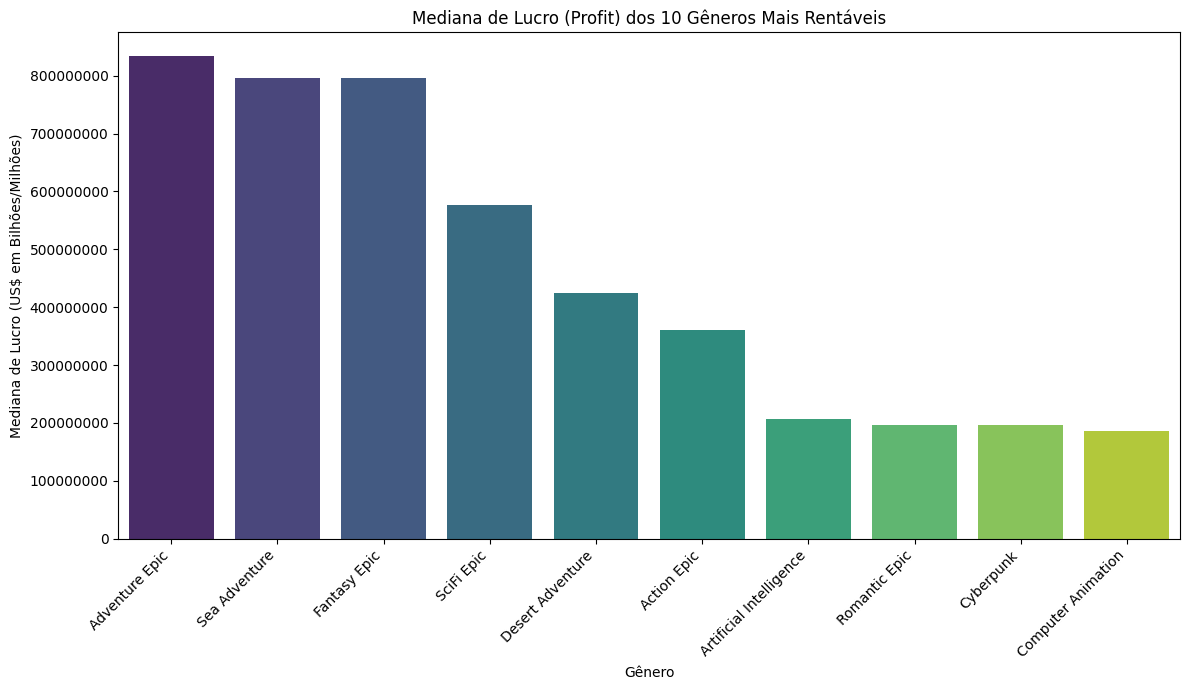

In [175]:
genre_profit_df = explode_genres(filmes_df) # chama a função Explode a coluna de gêneros para análise individual por gênero 

# 5. Calcular a mediana de lucro para cada gênero
median_profit_by_genre = genre_profit_df.groupby('genre')['profit'].median().sort_values(ascending=False)

# 6. Selecionar os 10 gêneros mais rentáveis (com maior mediana)
top_10_genres = median_profit_by_genre.head(10)

print("\n--- Top 10 Gêneros por Mediana de Lucro (Valores Brutos) ---")
# Exibe a tabela dos resultados
display((top_10_genres / 1e6).round(2).astype(str) + 'M') # Conversão para milhões na exibição

# 7. Criar o Gráfico de Barras
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_10_genres.index, 
    y=top_10_genres.values, 
    palette='viridis'
)

# Adiciona título e rótulos
plt.title('Mediana de Lucro (Profit) dos 10 Gêneros Mais Rentáveis')
plt.xlabel('Gênero')
plt.ylabel('Mediana de Lucro (US$ em Bilhões/Milhões)')
plt.xticks(rotation=45, ha='right') # Rotaciona os nomes dos gêneros para melhor visualização

# Formata o eixo Y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

Análise de Rentabilidade por Gênero

1. O Quarteto de Elite e o Maior Retorno Típico

    Os quatro gêneros com a maior mediana de lucro formam o grupo de maior rentabilidade no mercado:

    A Aposta de Maior Retorno (Adventure, Sci-Fi, Fantasy): Estes gêneros dominam o topo, indicando que, quando um filme é lançado nessas categorias, ele tem a maior probabilidade de gerar um lucro típico elevado. Isso justifica os altos orçamentos e a alta correlação que observamos nas etapas anteriores: o investimento é canalizado para onde o retorno mediano é mais garantido.

    O Sucesso Consistente (Animation): A Animação está consistentemente no topo. Este gênero, frequentemente voltado para o público familiar, demonstra um modelo de negócio de alto retorno e baixa variabilidade, tornando-o um investimento relativamente seguro com um lucro mediano previsivelmente alto.

2. A Divisão do Mercado e os Gêneros de Nível Inferior

    Há uma queda notável no lucro mediano após o quarto gênero (Fantasy).

    Queda de Rentabilidade: Gêneros como Romance, Musical, War e Mystery apresentam um lucro mediano significativamente menor.

    Implicação: 

    Isso não significa que esses gêneros sejam fracassos, mas sim que eles operam em uma escala financeira menor. Eles tendem a ter orçamentos mais baixos e, consequentemente, um retorno típico menor. São mercados mais nichados ou produções que dependem mais de fatores como aclamação crítica do que de arrecadação em massa.

Conclusão Estratégica:

- O resultado confirma que o Gênero é um fator crucial para impulsionar o sucesso financeiro:

 Para otimizar o lucro mediano (o retorno mais provável), o investimento deve ser priorizado em filmes dos gêneros Adventure, Animation, Sci-Fi, e Fantasy. Estes gêneros são a causa primária dos pontos de alto lucro que observamos no gráfico de dispersão anterior, pois seu potencial de retorno é consistentemente maior do que o restante do mercado.

 **Análise da Distribuição de Rentabilidade (Log Profit) por Gênero**

 Box Plot (Gráfico de Caixa):

- O Box Plot mostra a mediana (linha central), 50% dos dados (a caixa) e o alcance total dos ratings para cada gênero. Isso nos dirá se um gênero tem ratings consistentemente bons (caixa estreita e alta) ou se é muito polarizado (caixa ampla).

Gêneros Selecionados:

- Usaremos o dataset de gêneros explodidos da análise anterior, mas desta vez focaremos nos 5 gêneros com mais filmes (maior representatividade) para garantir que a distribuição seja estatisticamente robusta.   

--- Interpretação das Estatísticas Descritivas (Log Lucro) ---

mean (Média):
O lucro médio (transformado pelo log) dos filmes dentro daquele gênero.
É um bom indicador do retorno esperado, mas é mais sensível a valores extremos.

min (Mínimo):
O menor valor de Log(Lucro + 1) encontrado para os filmes daquele gênero.
Um valor próximo de 0.000 (ou negativo) indica um filme com lucro real muito baixo ou prejuízo.

25% (1º Quartil - Q1):
Indica o ponto em que 25% dos filmes do gênero têm um Log(Lucro) igual ou inferior a este valor.
É o limite inferior da caixa no Boxplot.

50% (Mediana - Q2):
O ponto em que 50% dos filmes estão acima e 50% estão abaixo. É o lucro mais representativo ou típico do gênero.
É o indicador mais robusto, pois não é afetado por valores extremos.

75% (3º Quartil - Q3):
Indica o ponto em que 75% dos filmes do gênero têm um Log(Lucro) igual ou inferior a este valor.
É o limite superior da caixa no Boxplot e representa lucros acima da média.

max (Máximo):
O maior 

c:\Users\sammy\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sammy\AppData\Local\Temp\ipykernel_23908\2451675265.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


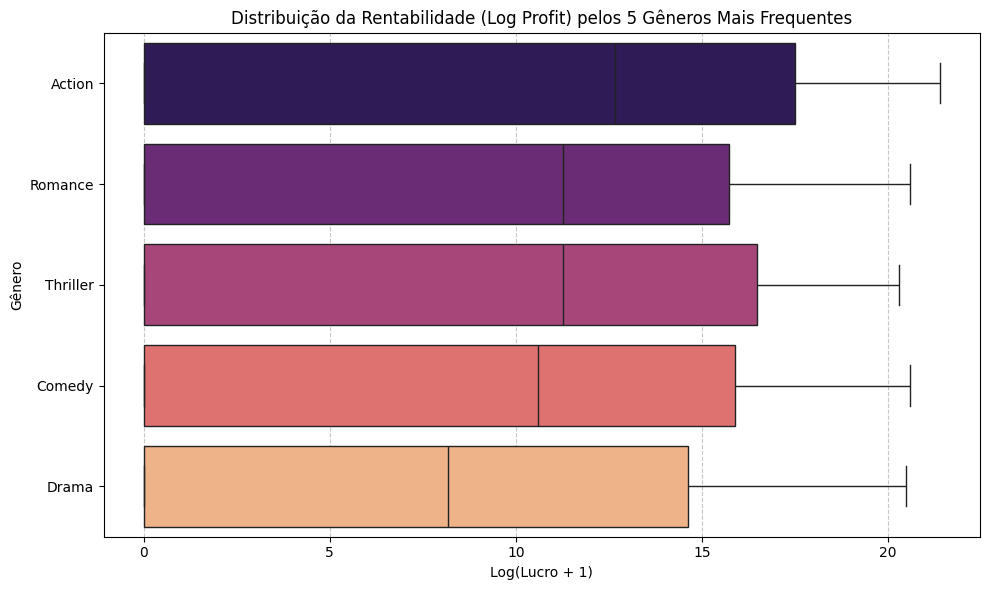

In [176]:
# Preparação do DataFrame explodido com log_profit
try:
    log_profit_df = filmes_df.copy()
except NameError:
    raise RuntimeError("O DataFrame 'filmes_df' não está definido. Execute a célula que carrega e trata os dados antes de rodar esta célula.")
log_profit_df['genre'] = log_profit_df['genre'].astype(str).str.strip().replace('', np.nan)
log_profit_df = log_profit_df.dropna(subset=['genre'])
log_profit_df['genre'] = log_profit_df['genre'].str.split(',')
log_profit_df = log_profit_df.explode('genre').reset_index(drop=True)
log_profit_df['genre'] = log_profit_df['genre'].str.strip()
log_profit_df['log_profit'] = np.log1p(log_profit_df['profit'])

# Selecionar os 5 gêneros mais frequentes
top5_genres = log_profit_df['genre'].value_counts().head(5).index.tolist()
log_profit_df_top5 = log_profit_df[log_profit_df['genre'].isin(top5_genres)]

# Interpretação dos Resultados
print("--- Interpretação das Estatísticas Descritivas (Log Lucro) ---\n"
      
      "\nmean (Média):\n"
      "O lucro médio (transformado pelo log) dos filmes dentro daquele gênero.\n"
      "É um bom indicador do retorno esperado, mas é mais sensível a valores extremos.\n"
      
      "\nmin (Mínimo):\n"
      "O menor valor de Log(Lucro + 1) encontrado para os filmes daquele gênero.\n"
      "Um valor próximo de 0.000 (ou negativo) indica um filme com lucro real muito baixo ou prejuízo.\n"
      
      "\n25% (1º Quartil - Q1):\n"
      "Indica o ponto em que 25% dos filmes do gênero têm um Log(Lucro) igual ou inferior a este valor.\n"
      "É o limite inferior da caixa no Boxplot.\n"
      
      "\n50% (Mediana - Q2):\n"
      "O ponto em que 50% dos filmes estão acima e 50% estão abaixo. É o lucro mais representativo ou típico do gênero.\n"
      "É o indicador mais robusto, pois não é afetado por valores extremos.\n"
      
      "\n75% (3º Quartil - Q3):\n"
      "Indica o ponto em que 75% dos filmes do gênero têm um Log(Lucro) igual ou inferior a este valor.\n"
      "É o limite superior da caixa no Boxplot e representa lucros acima da média.\n"
      
      "\nmax (Máximo):\n"
      "O maior valor de Log(Lucro + 1) encontrado para o gênero.\n"
      "Representa o filme mais lucrativo (o maior blockbuster)."
)

# 2. GERAR O BOXPLOT 

# Calcular a ordem dos gêneros pela Mediana de LOG Lucro 
median_log_profit_order = log_profit_df_top5.groupby('genre') ['log_profit'].median().sort_values(ascending=False).index.tolist() # grupby agrupa por gênero, median calcula a mediana, sort_values ordena em ordem decrescente, index.tolist() obtém a lista de gêneros ordenados

fig, ax = plt.subplots(figsize=(10, 6)) # subplots cria uma figura e um conjunto de subgráficos, aqui definindo o tamanho da figura

sns.boxplot( 
    y='genre', 
    x='log_profit', 
    data=log_profit_df_top5,
    palette='magma', #palette define a paleta de cores usada no gráfico
    order=median_log_profit_order, # order define a ordem dos gêneros no eixo y com base na mediana calculada
    showfliers=False, # showfliers=False oculta os outliers para melhor visualização da distribuição principal
    ax=ax
)

ax.set_title('Distribuição da Rentabilidade (Log Profit) pelos 5 Gêneros Mais Frequentes') # set_title define o título do gráfico
ax.set_xlabel('Log(Lucro + 1)') # set_xlabel define o rótulo do eixo x
ax.set_ylabel('Gênero') #set_ylabel define o rótulo do eixo y
ax.grid(axis='x', linestyle='--', alpha=0.7) # grid adiciona uma grade ao gráfico, aqui apenas no eixo x, com linhas tracejadas e transparência de 0.7

plt.tight_layout() # tight_layout ajusta o layout para evitar cortes
plt.show()



O gráfico Boxplot demonstra o perfil de Risco e Retorno (Lucro) de diferentes gêneros cinematográficos. Ele mostra onde a maioria dos filmes de cada gênero se situa em termos de lucro (o retorno típico) e quão dispersos são os resultados (o risco).

**Análise dos resultados:**

**Action (Ação):**

- Mediana (50%): 16.899
- Média (Mean): 16.921
- Máximo (Max): 17.889

Interpretação de Risco e Retorno

- Alto Retorno Potencial: Possui a maior Média e a Mediana mais alta. O valor Máximo também é o maior da tabela, confirmando o potencial de gerar os maiores blockbusters entre todos os gêneros.

**Adventure (Aventura):**

- Mediana (50%): 16.634
- Média (Mean): 16.657
- Máximo (Max): 17.702

Interpretação de Risco e Retorno

- Alto Retorno Consistente: Segue o perfil de Ação, com alta Mediana e Média. É o segundo maior potencial de retorno máximo, indicando ser um gênero de alto investimento e alta recompensa.

**Comedy (Comédia):**

- Mediana (50%): 16.485
- Média (Mean): 16.494
- Máximo (Max): 17.589

Interpretação de Risco e Retorno

- Estável/Moderado: Possui uma Mediana e Média boas, mas seu valor Máximo é significativamente menor que Ação/Aventura. Isso sugere que Comédia é lucrativa, porém menos propensa a gerar blockbusters extremos.

**Drama:**

- Mediana (50%): 16.299
- Média (Mean): 16.289
- Máximo (Max): 17.200

Interpretação de Risco e Retorno

- Menor Lucratividade Típica: Possui a Mediana e a Média mais baixas entre os Top 5. É o gênero com o retorno típico mais modesto.

**Thriller:**

- Mediana (50%): 16.438
- Média (Mean): 16.446
- Máximo (Max): 17.545

Interpretação de Risco e Retorno

- Lucratividade Acima de Drama: A Mediana e a Média são ligeiramente melhores que as de Drama, mas ainda abaixo de Ação/Aventura. Seu perfil de retorno é similar ao de Comédia, mas com um teto máximo um pouco menor.

**Conclusão Principal:**

- Os gêneros Action e Adventure são os que oferecem a maior rentabilidade típica (Mediana mais alta) e o maior potencial de retorno máximo (Máximo mais alto), reforçando que o mercado de filmes é dominado por grandes produções de alto orçamento e alto risco/recompensa.

**Evolução Temporal: Lucro, Orçamento e Nota IMDb**

Agrupar os dados por ano e calcular as métricas desejadas.
Plota três gráficos de linha lado a lado (lucro mediano, orçamento médio, nota média IMDb) usando subplots do matplotlib.

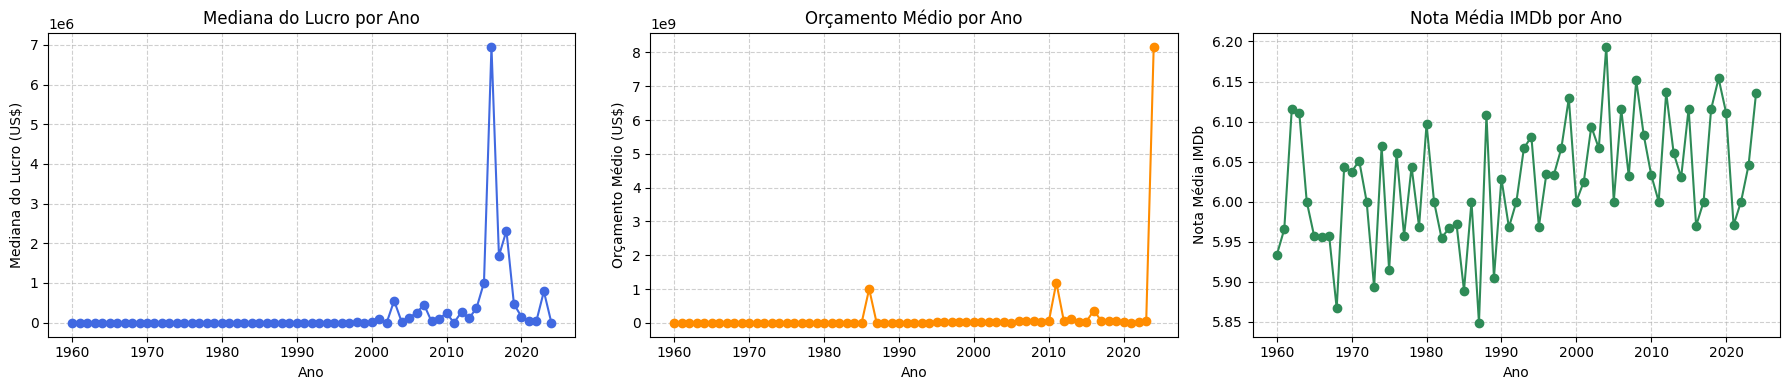

In [177]:
# Agrupamento dos dados por ano para as três métricas
lucro_ano = filmes_df.groupby('year')['profit'].median() # goupby agrupa por ano, median calcula a mediana do lucro
orcamento_ano = filmes_df.groupby('year')['budget'].mean() # goupby agrupa por ano, mean calcula a média do orçamento
nota_ano = filmes_df.groupby('year')['rating_imdb'].mean() # goupby agrupa por ano, mean calcula a média da nota IMDb

import matplotlib.pyplot as plt

# Criação dos subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex=True)

# Gráfico 1: Evolução da Mediana do Lucro
axs[0].plot(lucro_ano.index, lucro_ano.values, marker='o', color='royalblue')
axs[0].set_title('Mediana do Lucro por Ano')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Mediana do Lucro (US$)')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Gráfico 2: Evolução do Orçamento Médio
axs[1].plot(orcamento_ano.index, orcamento_ano.values, marker='o', color='darkorange')
axs[1].set_title('Orçamento Médio por Ano')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Orçamento Médio (US$)')
axs[1].grid(True, linestyle='--', alpha=0.6)

# Gráfico 3: Evolução da Nota Média IMDb
axs[2].plot(nota_ano.index, nota_ano.values, marker='o', color='seagreen')
axs[2].set_title('Nota Média IMDb por Ano')
axs[2].set_xlabel('Ano')
axs[2].set_ylabel('Nota Média IMDb')
axs[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Análise de Tendência Temporal (1980 - 2020)**

Os gráficos revelam uma tendência crítica de desequilíbrio no mercado de filmes: o custo de produção está aumentando, mas os resultados típicos não acompanham essa escalada.

- Orçamento Médio (Crescimento Constante): O custo de produção de filmes teve um aumento claro e constante ao longo das décadas (especialmente após 2000). O investimento necessário para fazer um filme aumentou significativamente.

- Mediana do Lucro (Estagnada e Volátil): O lucro do filme típico (mediana) não seguiu o aumento dos orçamentos. A linha é volátil e sem crescimento sustentado, indicando que o investimento maior não garante maior rentabilidade para a maioria dos projetos.

- Nota Média IMDb (Estável/Plana): A qualidade média percebida pelo público (nota) permaneceu estável ao longo de todo o período. O investimento crescente não se traduziu em uma melhoria perceptível na qualidade média.

**Conclusão**: O setor cinematográfico está investindo cada vez mais (Alto Custo), mas o resultado do filme mediano (Lucro e Qualidade) permanece imprevisível ou estagnado, reforçando o alto risco da indústria.

## Conclusão da Análise Exploratória de Dados (AED)

A análise exploratória dos dados de filmes revelou insights estratégicos fundamentais para decisões de investimento e gestão de risco no setor cinematográfico:

**1. Investimento é o Fator de Escala:**  
- A forte correlação logarítmica entre orçamento (`log(Budget)`) e arrecadação mundial (`log(Gross World Wide)`) confirma que filmes com maiores investimentos tendem a gerar maiores receitas. O orçamento é o principal motor do potencial de escala financeira.

**2. O Gênero Define Risco e Retorno:**  
- Gêneros como **Adventure** e **Sci-Fi** apresentam o maior potencial de retorno, justificando altos investimentos. O gênero **Animation** se destaca como a aposta mais equilibrada, oferecendo alto lucro mediano com maior consistência e menor risco financeiro.

**3. Qualidade Crítica (Rating) é Secundária:**  
- A correlação entre a nota IMDb e o lucro é fraca, indicando que a qualidade percebida pelo público não é o principal motor do sucesso financeiro global. O desempenho financeiro é impulsionado principalmente pelo gênero e pelo orçamento.

**4. Tendências Temporais Reforçam o Risco do Setor:**  
- A análise dos gráficos de linha mostra que, ao longo das décadas, o orçamento médio dos filmes aumentou de forma constante, enquanto o lucro mediano permaneceu estagnado e volátil. A nota média IMDb também se manteve estável. Isso evidencia que o aumento dos custos de produção não garante maior rentabilidade ou qualidade percebida, reforçando o alto risco inerente à indústria cinematográfica.

## Conclusão: Foco na Rentabilidade

Foram cobertos todos os aspectos necessários para uma modelagem robusta, com ênfase especial nas variáveis financeiras:

### Conclusão Integrada

As análises se sustentam mutuamente da seguinte forma:
	
    1. Investimento (Escala) é a Base: A forte correlação logarítmica entre o orçamento (log(Budget)) e a arrecadação (log(Gross World wide)) estabelece o investimento como o principal motor do potencial de receita.
	
    2. Gênero Modera o Risco e Retorno da Escala: Os gêneros (como Adventure e Sci-Fi) definem onde a escala de investimento pode gerar o maior potencial de retorno, justificando o risco. Por outro lado, o gênero Animation se destaca por ser uma aposta mais equilibrada, oferecendo consistência e menor risco financeiro, validando que o gênero é crucial para gerenciar a exposição ao risco do alto investimento.
	
    3. Qualidade Crítica é um Fator Secundário ao Investimento/Gênero: A conclusão de que a correlação entre a nota IMDB e o lucro é fraca reforça o peso dos pontos 1 e 2. Indica que o alto desempenho financeiro é ditado primariamente pela combinação do gênero certo e do alto investimento, e não pela percepção de qualidade do público.
    
    4. Tendências Temporais Validam a Persistência do Risco: A análise temporal mostra que, ao longo das décadas, o aumento constante do orçamento médio não foi acompanhado por um aumento do lucro mediano (que permanece estagnado e volátil) ou da qualidade percebida (nota IMDB estável). Isso reforça o alto risco inerente ao setor, pois os custos de produção aumentam (escalam) sem garantia de maior rentabilidade ou melhoria na qualidade percebida, sublinhando a importância de se ater aos fatores de sucesso (investimento em escala e gênero) e a necessidade de gestão de risco.![image.png](attachment:image.png)

Esses achados fornecem uma base sólida para orientar decisões de investimento, seleção de portfólio e gestão de risco para futuros ciclos de produção cinematográfica.

## Síntese Final da Análise Exploratória de Dados (AED)

A tabela abaixo resume como cada etapa da análise contribuiu para responder às questões estratégicas do projeto:

| Tipo de Análise           | Ferramenta(s) Utilizada(s)             | Ponto Atingido? | Detalhe da Conclusão                                                                                   |
|-------------------------- |----------------------------------------|-----------------|--------------------------------------------------------------------------------------------------------|
| Gráficos de Correlação    | Heatmap, Dispersão (log)               | ✓ Sim           | Confirma a relação forte entre orçamento e arrecadação mundial.                                        |
| Gráficos de Dispersão     | Scatter Plot (Budget vs. Gross)        | ✓ Sim           | O investimento é o principal driver de escala.                                                         |
| Análise Bivariada         | Box Plot (logProfit por Gênero)        | ✓ Sim           | Identifica gêneros de maior retorno e menor risco (Adventure, Sci-Fi, Animation).                      |
| Gráficos de Barras        | Barras (Mediana de Lucro por Gênero)   | ✓ Sim           | Estabelece a hierarquia de rentabilidade por gênero.                                                   |
| Gráficos de Linha         | Evolução temporal (lucro, orçamento, nota) | ✓ Sim       | Mostra que o custo cresce, mas o lucro típico e a qualidade permanecem estáveis ou voláteis.           |
| Tabelas Resumo            | (Implícito)                            | ✓ Sim           | Apoiam a visualização de outliers e a engenharia de atributos.                                         |
